The witch of Agnesi has the following form: 
\begin{align}
    y = \frac{ 8a^3 }{ x^2 + 4a^2 }
\end{align}
We set $a = 1/2$, such that:
\begin{align}
    y = \frac{ 1 }{ x^2 + 1 }
\end{align}
Which has the following series representation: 
\begin{align}
    y &= \sum_{n = 0}^{\infty} (-1)^n x^{2n} & |x| < 1 
\end{align}
Note that for $|x| = 1$ we have 
\begin{align}
    \sum_{n = 0}^{\infty} (-1)^n  = 1 - 1 + 1 - 1 + 1 - 1 + ...
\end{align}
Which can be shown does not converge through the use of classic methods. 
(That being said, by use of the Riemann zeta function one can show that this series "converges" to $1/2$, which conveniantly matched the value of $y$)

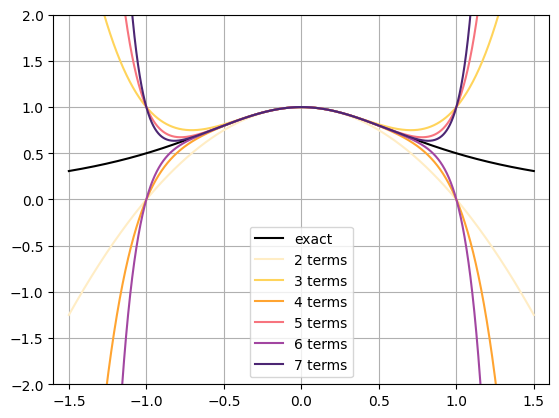

In [1]:
"""agnesi_witch.ipynb"""
# cell 2

from __future__ import annotations
import numpy as np 
import matplotlib.pyplot as plt
import typing 
if typing.TYPE_CHECKING: 
    from numpy.typing import NDArray 

def p(n: int ) -> NDArray[np.float_]: 
    """
    Function that provides graph of maclaurin approximation of Agnesi's witch (AW) \n
    input \n
    n = the amount of desired terms \n
    output \n
    x[0,:] = argument of AW \n
    x[1,:] = approximation with n + 1 terms of AW \n
    x[2,:] = exact value of AW 
    """
    
    # number of data points
    dp: int = 10_000

    # generating function array
    x: NDArray[np.float_] = np.zeros((3,dp)) + 1

    # assigning function domain 
    x[0,:] = np.linspace(-1.5,1.5,dp)

    # approximaion with n + 1 terms 
    x[1,:] = 1
    for i in range(1,n+1): 
        x[1,:] += (-1) ** i * x[0,:] ** (2 * i)

    # exact value 
    x[2,:] = 1 / ( x[0,:] ** 2 + 1 )
    return x
    
plt.plot(p(1)[0,:], p(1)[2,:], label = 'exact', color = (0,0,0) )
plt.plot(p(1)[0,:], p(1)[1,:], label = '2 terms', color = '#FFEDC5' )
plt.plot(p(2)[0,:], p(2)[1,:], label = '3 terms', color = '#FFD45B' )
plt.plot(p(3)[0,:], p(3)[1,:], label = '4 terms', color = '#FFA431' )
plt.plot(p(4)[0,:], p(4)[1,:], label = '5 terms', color = '#F7747E' )
plt.plot(p(5)[0,:], p(5)[1,:], label = '6 terms', color = '#A246A1' )
plt.plot(p(6)[0,:], p(6)[1,:], label = '7 terms', color = '#4C2673' )

plt.xlim(-1.6,1.6)
plt.ylim(-2,2)
plt.grid(True)

plt.legend()
plt.show()

let us consider an analytical continuation by sugesting: 
\begin{align}
    f_z &= \sum_{n = 0}^{\infty} (-1)^n z^{2n} & z \in \mathbb{C}
\end{align}
Now lets explore the case $z = i$: 
\begin{align}
    f_i &= \sum_{n = 0}^{\infty} (-1)^n i^{2n} \\
    &= \sum_{n = 0}^{\infty} (-1)^n (i^2)^n \\
    &= \sum_{n = 0}^{\infty} (-1)^n (-1)^n \\
    &= \sum_{n = 0}^{\infty} [(-1)(-1)]^n \\
    &= \sum_{n = 0}^{\infty} [1]^n \\
    &= 1 + 1 + 1 + 1 + 1 + 1 + ...
\end{align}
We now consider the case for $z = -i$: 
\begin{align}
    f_{-i} &= \sum_{n = 0}^{\infty} (-1)^n (-i)^{2n} \\
    &= \sum_{n = 0}^{\infty} (-1)^n ((-i)^2)^n \\
    &= \sum_{n = 0}^{\infty} (-1)^n (-1)^n = f_i 
\end{align}
These series diverge. 
(That being said, by use of the Riemann zeta function one can show that this series "converges" to $-1/2$)

The oscilation that is found at the specified points are a result of the series for $y$ being a telescopic series. We must therefore be cautious of using these aproximations near the edge of the interval of convergence for it oscilates wildly between $-1$ and $1$, which is an example of Runge's Phenomenon.
